# KNN

In [6]:
#Importation des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [15]:
#Charger le dataset digits
digits = load_digits()
x, y = digits.data, digits.target

In [16]:
# _, axes = plt.subplots(nrows=1, ncols=4, figsize=(0, 0))
# for ax, image, label in zip(axes, digits.images, digits.target):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
#     ax.set_title("Image: %i" % label)

In [17]:
#Creation jeu d'apprentissage
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
#Creer le modele knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
# Le taux de prediction 
score = knn.score(x_test, y_test)
print('Score: %f' % score)

Score: 0.983333


In [20]:
#Tester k de 1 a 20
neighbors = np.arange(1, 21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

In [21]:
print(test_accuracy)

[0.99166667 0.98888889 0.98888889 0.98611111 0.98888889 0.98055556
 0.98333333 0.98611111 0.98333333 0.975      0.98055556 0.97777778
 0.97777778 0.975      0.975      0.975      0.975      0.97222222
 0.97222222 0.96944444]


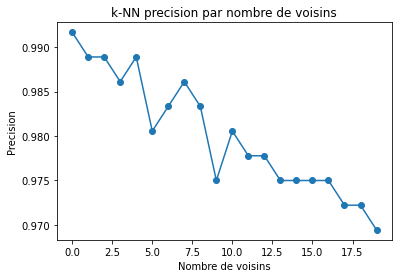

In [23]:
#Visualisation taux de prediction (test)
plt.plot(test_accuracy, 'o-')
plt.title('k-NN precision par nombre de voisins')
plt.xlabel('Nombre de voisins')
plt.ylabel('Precision')
plt.show()

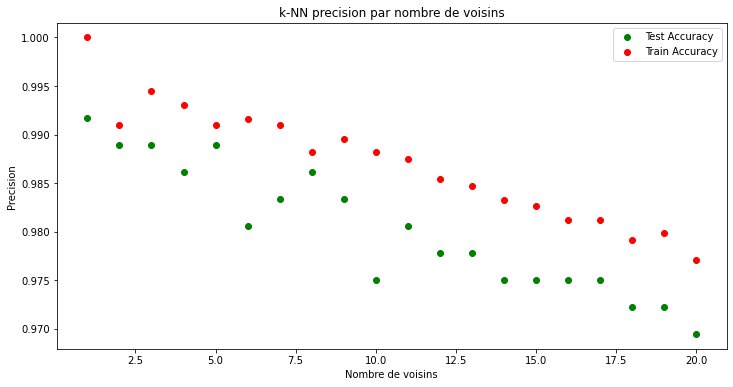

In [25]:
#Visualisation taux d'apprentissage et test
plt.figure(figsize=(12, 6))
plt.title('k-NN precision par nombre de voisins')
plt.scatter(neighbors, test_accuracy, label='Test Accuracy', color = 'green')
plt.scatter(neighbors, train_accuracy, label='Train Accuracy', color = 'red')
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Precision')
plt.show()

In [26]:
y_pred = knn.predict(x_test)

In [27]:
#Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 25,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  1, 39,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 37]], dtype=int64)

In [28]:
np.bincount(y_test)

array([34, 45, 37, 30, 36, 32, 26, 38, 43, 39], dtype=int64)